<a href="https://colab.research.google.com/github/SaifuliAnna/DataScience_HW11/blob/main/HW_11(CNN_part_two).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import itertools

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt# Reading Train Data
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("Shape of Train : " + str(train_images.size))
print("Shape of Train : " + str(train_labels.size))
print("Shape of Train : " + str(test_images.size))
print("Shape of Train : " + str(test_labels.size))

4422102/4422102 [==============================] - 0s 0us/step
Shape of Train : 47040000
Shape of Train : 60000
Shape of Train : 7840000
Shape of Train : 10000


Example Images from Dataset

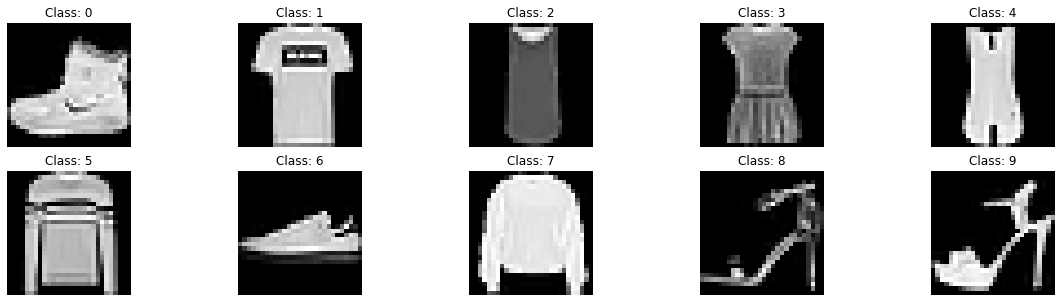

In [ ]:
plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    img = train_images[i]
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')
    
plt.show()

Normalization

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Reshape

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)


X_train Shape:  (60000, 28, 28, 1)
X_test Shape:  (10000, 28, 28, 1)


Label Encoding

We turn our classes into one-hot encoding label.

In [ ]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 42)

print("x_train shape",x_train.shape)
print("x_test shape",x_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (42000, 28, 28, 1)
x_test shape (18000, 28, 28, 1)
y_train shape (42000, 10)
y_test shape (18000, 10)


Implementing Convolutional Neural Network Algorithm with Keras

Create Model

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

Optimizer

Adam optimizer we can say adam optimizer updates leraning rate dynamically.

In [ ]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False);

Compile Model

Since we have 10 classes we’ll use categorical crossentropy.

In [ ]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

Epoch and Batch Size

Epoch is the number of times the algorithm sees the entire data set. If one epoch is too big to run to the computer at once we divide it smaller parts and number of this parts is called batch.

In [ ]:
epochs = 100
batchSize = 300
steps_per_epoch=x_train.shape[0] // batchSize

Data Augmentation

By using “data augmentation” we can create new data with different orientations. It prevents overfitting.

Data Augmentation

By using “data augmentation” we can create new data with different orientations. It prevents overfitting.

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range =0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip imagesdatagen.fit(x_train)

datagen.fit(x_train)

Fit The Model

In [ ]:
cnn = model.fit(datagen.flow(x_train, y_train, batch_size=batchSize), epochs=epochs, validation_data=(x_val, y_val), steps_per_epoch=steps_per_epoch)

In [ ]:
model.save("my_model_cnn_1")

Evaluate The Model

In [ ]:
test_loss, test_acc = model.evaluate(x_val, y_val)

print(f'\nTest loss:{test_loss},    Test accuracy:{test_acc}')

563/563 [==============================] - 2s 3ms/step - loss: 0.2007 - accuracy: 0.9266

Test loss:0.20067347586154938,    Test accuracy:0.9265555739402771


In [ ]:
print(f"Accuracy after fitting: {cnn.history['accuracy'][-1]*100}%")

# For better accuracy i can increase number of epochs or i can change 
# parameters on layers or i can add additional layer to the model.

Accuracy after fitting: 91.25476479530334%


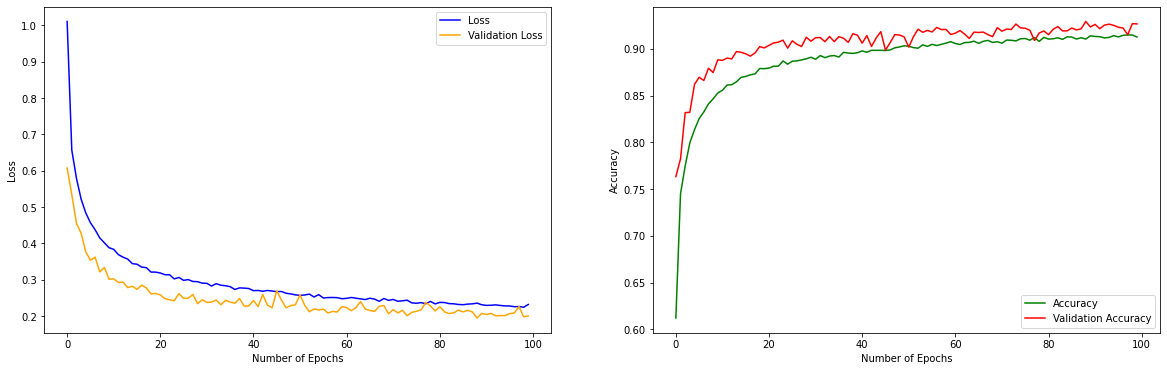

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(cnn.history['loss'], color="blue", label = "Loss")
plt.plot(cnn.history['val_loss'], color="orange", label = "Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(cnn.history['accuracy'], color="green", label = "Accuracy")
plt.plot(cnn.history['val_accuracy'], color="red", label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

out score by giving test data we imported before

In [ ]:
Y_test = to_categorical(Y_test, num_classes=10) # One-Hot Encoding
score = model.evaluate(X_test, Y_test)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]*100}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.2131 - accuracy: 0.9236
Test Loss: 0.21313349902629852
Test Accuracy: 92.36000180244446%


313/313 [==============================] - 1s 2ms/step


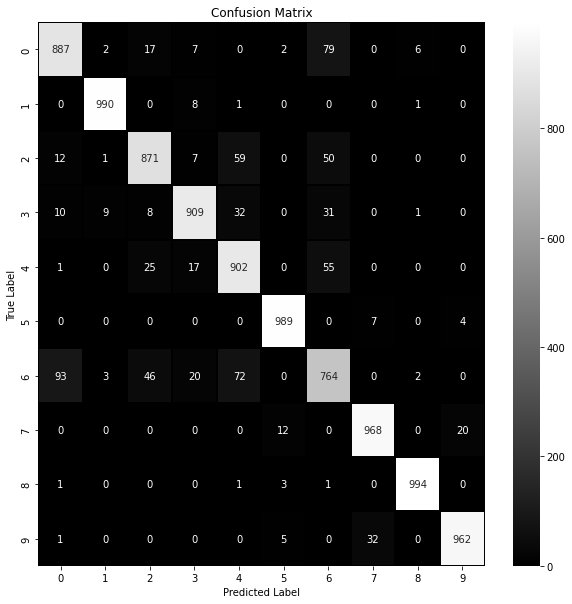

In [ ]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_test, axis = 1)
confusionMatrix = confusion_matrix(Y_true, Y_pred_classes)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
for i in range(len(confusionMatrix)):
    print(f"Class: {str(i)}")
    print(f"Number of Wrong Prediction: {str(sum(confusionMatrix[i])-confusionMatrix[i][i])} out of 1000")
    print(f"Percentage of True Prediction: {confusionMatrix[i][i] / 10}% ")
    print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

Class: 0
Number of Wrong Prediction: 113 out of 1000
Percentage of True Prediction: 88.7% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 1
Number of Wrong Prediction: 10 out of 1000
Percentage of True Prediction: 99.0% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 2
Number of Wrong Prediction: 129 out of 1000
Percentage of True Prediction: 87.1% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 3
Number of Wrong Prediction: 91 out of 1000
Percentage of True Prediction: 90.9% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 4
Number of Wrong Prediction: 98 out of 1000
Percentage of True Prediction: 90.2% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 5
Number of Wrong Prediction: 11 out of 1000
Percentage of True Prediction: 98.9% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 6
Number of Wrong Prediction: 236 out of 1000
Percentage of True Prediction: 76.4% 
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 7
Number of Wrong Prediction: 32 out of 1000
Percentage of True Prediction: 96.8% 
<<<<<<<<<<<

As you can see above we should focus on especially Class 6 to improve our score, Class 0 and Class 2

## Висновок:

Максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі у данному прикладі не досягла, оскільки на це потрібно трохи більше часу та швидкості навчання, але оскільки я спробувла провести дослідження по двом мережам з подібними параметрами (лише трохи вімінними між собою), тому можу порівняти точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання (яке провела тут додатково). 

Точність багатошаровоі мережі не тільки нижча, у ній спостерігається значне перенавчання. 

Отже точність згорткової мережі більша і краща якість навчання. 

